In [ ]:
!pip install qiskit


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Installing backend dependencies ... done
  Preparing metadata (pyproject.toml) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.9/5.9 MB 53.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 114.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 241.5/241.5 kB 32.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 17.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 102.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 110.5/110.5 kB 9.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 6.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.5/37.5 MB 20.6 MB/s eta 0:00:00

In [ ]:
from qiskit import QuantumCircuit, assemble, transpile, Aer, execute

# Kuantum devresini oluşturma
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)

# Kuantum devresini derleme
simulator = Aer.get_backend('qasm_simulator')
compiled_circuit = transpile(qc, simulator)

# Kuantum devresini çalıştırma
job = simulator.run(compiled_circuit)
result = job.result()

# Sonucu alma
counts = result.get_counts()
print(counts)


{'1': 497, '0': 527}


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


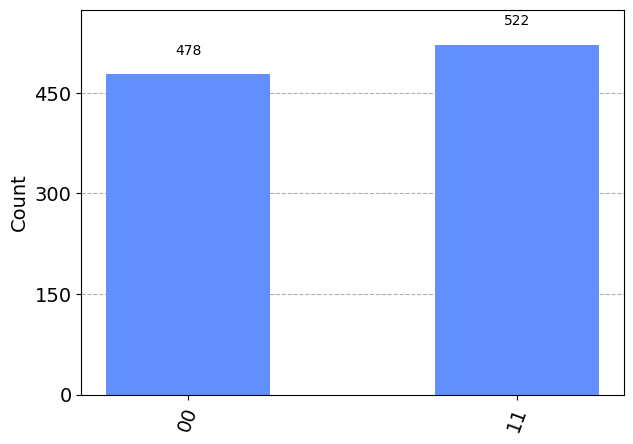

In [ ]:


!pip install qiskit matplotlib

from qiskit import QuantumCircuit, execute, Aer
from qiskit.visualization import plot_histogram

# Kuantum devresini oluşturma
circuit = QuantumCircuit(2, 2)
circuit.h(0)
circuit.cx(0, 1)
circuit.measure([0, 1], [0, 1])

# Simülasyonu çalıştırma
simulator = Aer.get_backend('qasm_simulator')
job = execute(circuit, simulator, shots=1000)
result = job.result()
counts = result.get_counts(circuit)

# Sonuçları görselleştirme
plot_histogram(counts)



In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
import numpy as np
from qiskit import QuantumCircuit, transpile, assemble, Aer, execute

# Görüntü verisi
image = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])  # Örnek bir 3x3 siyah-beyaz görüntü

# Kuantum devresi tasarımı
qc = QuantumCircuit(9, 9)  # 9 kubitli ve 9 klasik bitli bir kuantum devresi

# Görüntüyü kuantum bitlere kodlama
for i in range(3):
    for j in range(3):
        if image[i][j] == 1:
            qc.x(3 * i + j)  # Kubitleri ters çevir

# Hesaplama ve sonuç analizi
qc.measure(range(9), range(9))  # Kubitleri ölçümle

# Simülasyon
simulator = Aer.get_backend('qasm_simulator')
job = execute(qc, simulator, shots=1)
result = job.result()
counts = result.get_counts(qc)

print(counts)  # Sonucu ekrana yazdır



{'010101010': 1}


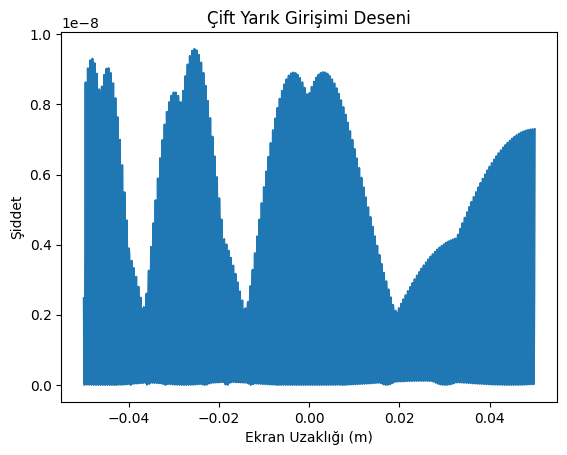

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def double_slit_interference(wavelength, slit_width, slit_distance, screen_distance, screen_width, num_points):
    # Değişkenlerin hesaplanması
    k = 2 * np.pi / wavelength  # Dalga sayısı
    x = np.linspace(-screen_width / 2, screen_width / 2, num_points)  # Ekran üzerindeki noktalar

    # Yarık girişim deseninin hesaplanması
    intensity = np.zeros(num_points)
    for i in range(num_points):
        # İlk yarık
        path_difference1 = slit_distance * np.sin(np.arctan(x[i] / screen_distance))
        amplitude1 = np.cos(k * path_difference1 / 2)  # İlk yarıkta dalga yüksekliği

        # İkinci yarık
        path_difference2 = slit_distance * np.sin(np.arctan((screen_width - x[i]) / screen_distance))
        amplitude2 = np.cos(k * path_difference2 / 2)  # İkinci yarıkta dalga yüksekliği

        # Toplam şiddet hesaplama
        intensity[i] = slit_width ** 2 * amplitude1 ** 2 * amplitude2 ** 2

    # Sonuçların görselleştirilmesi
    plt.plot(x, intensity)
    plt.xlabel('Ekran Uzaklığı (m)')
    plt.ylabel('Şiddet')
    plt.title('Çift Yarık Girişimi Deseni')
    plt.show()

# Örnek kullanım
wavelength = 500e-9  # Dalga boyu (500 nm)
slit_width = 100e-6  # Yarık genişliği (100 mikron)
slit_distance = 1e-3  # Yarık arası mesafe (1 mm)
screen_distance = 1  # Ekran ile yarık arası mesafe (1 m)
screen_width = 0.1  # Ekran genişliği (0.1 m)
num_points = 1000  # Ekran üzerindeki nokta sayısı

double_slit_interference(wavelength, slit_width, slit_distance, screen_distance, screen_width, num_points)


<ipython-input-1-3beaddfb3356>:24: ComplexWarning: Casting complex values to real discards the imaginary part
  holographic_image[x][y] += pixel_value * np.exp(1j * phase)


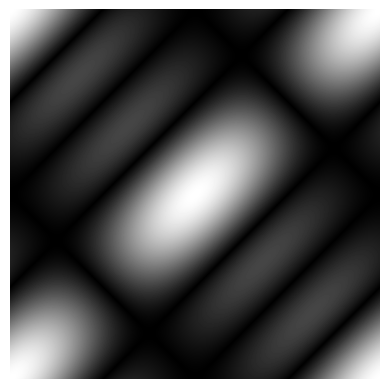

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Örnek bir 3x3 hologram dizisi
hologram = np.array([[0, 1, 0], [1, 0, 1], [0, 1, 0]])

# Hologramın boyutları
height, width = hologram.shape

# Holografik görüntünün boyutları
holographic_image_height = 512
holographic_image_width = 512

# Holografik görüntüyü depolamak için boş bir dizi oluşturun
holographic_image = np.zeros((holographic_image_height, holographic_image_width))

# Holografik görüntü oluşturma
for i in range(height):
    for j in range(width):
        pixel_value = hologram[i][j]
        for x in range(holographic_image_height):
            for y in range(holographic_image_width):
                phase = 2 * np.pi * (i * x / holographic_image_height + j * y / holographic_image_width)
                holographic_image[x][y] += pixel_value * np.exp(1j * phase)

# Holografik görüntüyü görselleştirme
plt.imshow(np.abs(holographic_image), cmap='gray')
plt.axis('off')
plt.show()



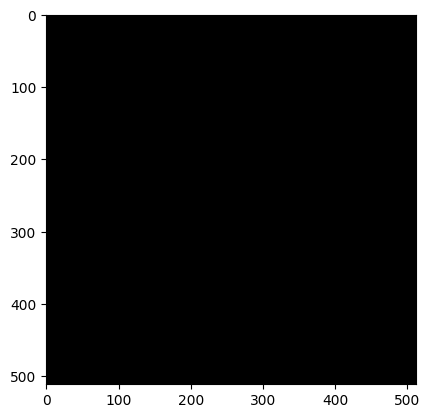

In [ ]:
holographic_image = np.zeros((holographic_image_height, holographic_image_width), dtype=complex)
plt.imshow(np.abs(holographic_image), cmap='gray')
